## Code to Clean a Text in Spanish from a CSV file

In [1]:
#Import the necesarry libraries

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import random
import seaborn as sns

import re, string, unicodedata                          
import contractions                                     
from bs4 import BeautifulSoup 
from collections import Counter         



import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize  
from nltk.stem.wordnet import WordNetLemmatizer         
import matplotlib.pyplot as plt                         
import seaborn as sns
import matplotlib.pyplot as plt

import spacy
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()


import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = "{:,.2f}".format
pd.options.display.precision = 3
pd.set_option('display.max_colwidth', None)

In [2]:
#Load the CSV file 
data = pd.read_csv('corpus_mx.csv')


## Check the data

In [3]:
data.head()

,text,sentiment
0,"El presidente brasileño, Jair Bolsonaro, firmó un decreto ejecutivo que establece nuevas reglas para el teletrabajo.",NEU
1,Nada justifica la violencia. Fomentemos valores y principios de respeto hacia las niñas y las mujeres. DíaNaranja emoji mandarina emoji,NEU
2,El presidente AMLO pide una disculpa a la gobernadora y miembros de la Junta de Gobierno por anunciar antes la decisión de política monetaria y reitera su compromiso con la autonomía de Banxico . url,NEG
3,Trump demanda a Hillary Clinton y al Comité Nacional Demócrata alegando conspiración para vincular su campaña con Rusia url,NEU
4,¿Robo a Perú? Uruguay consigue su boleto para el Mundial de Qatar2022 url,NEU


In [4]:
data.info(9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14426 entries, 0 to 14425
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       14426 non-null  object
 1   sentiment  14426 non-null  object
dtypes: object(2)
memory usage: 225.5+ KB


In [5]:
data.sentiment.value_counts()

NEU     5816
NEG     4474
POS     1538
N       1514
P        943
NONE     141
Name: sentiment, dtype: int64

## Data pre-processing STEP 1

- Remove htm tags
- Remove numbers 
- Remove urls
- Remove mentions 
- Remove tildes

In [6]:
# We will create multiple function for this step and then encompass all those functions into a single one.
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()


#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

# remove the url's present in the text
def remove_url(text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text

# remove the mentions in the clean
def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text

#remove specific words
def remove_specificwords(text):
           text = re.sub("url", '', text)
           text = re.sub("emoji", '', text)
           text = re.sub("ja", '', text)
           text = re.sub("jaja", '', text)
           text = re.sub("jajaja", '', text)
           text = re.sub("jajajaja", '', text)
           text = re.sub("jajajajaja", '', text)
           text = re.sub("jajajajajaja", '', text)
           text = re.sub("jajajajajajaja", '', text)
           text = re.sub("jajajajajajajaja", '', text)
           text = re.sub("jajajajajajajajaja", '', text)
           text = re.sub("jajajajajajajajajaja", '', text)
           return text

def remove_tilde(text):
    text = re.sub('\\u00f1', 'ñ',text)
    text = re.sub('\\u00e1', 'a',text)
    text = re.sub('\\u00e9', 'e',text)
    text = re.sub('\\u00ed', 'i',text)
    text = re.sub('\\u00f3', 'o',text)
    text = re.sub('\\u00fa', 'u',text)
    text = re.sub('\\u00bf', '¿',text)
    text = re.sub('\\u00a1', '¡',text)
    text = re.sub('\\u00d1', 'Ñ',text)
    text = re.sub('\\u00c1', 'A',text)
    text = re.sub('\\u00c9', 'E',text)
    text = re.sub('\\u00cd', 'I',text)
    text = re.sub('\\u00d3', 'O',text)
    text = re.sub('\\u00da', 'U',text)
    text = re.sub('\\u00fc', 'ü',text)
    text = re.sub('\\u00b0', '',text)    
    return text


#function that encompasses all of the above
def clean_text(text):
    text = strip_html(text)
    text = remove_numbers(text)
    text = remove_url(text)
    text = remove_mention(text)
    text = remove_specificwords(text)
    text = remove_tilde(text)
    return text

data['text'] = data['text'].apply(lambda x: clean_text(x))


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **IMPORTANT !!**

### <font color ='red'>**AVOID THIS STEP, IF YOU ARE RUNNING THIS FOR THE FIRTS TIME**</font>

#### Afterwards the first analysis, there is some specific words that are contained in the corpus, this code is intended to remove words that are repeated many times in a coprus , for examples, words that are text for emojis, that come as strings in the data set, this list is customizable and particular for each project, skip this step if you consider it not critical for your project.

In [7]:
#remove particular project related specific words 

def remove_particularwords(text):
            text = re.sub("url", '', text)
            text = re.sub("emoji cara", '', text)
            text = re.sub("risa emoji", '', text)
            text = re.sub("revolviéndose de la risa emoji", '', text)
            text = re.sub("emoji cara llorando", '', text)
            text = re.sub("ojo", '', text)
            text = re.sub("mano", '', text)
            text = re.sub("manos", '', text)
            text = re.sub("ojos", '', text)
            text = re.sub("ojos sonrientes", '', text)
            text = re.sub("sonriendo", '', text)
            text = re.sub("emoji manos", '', text)
            text = re.sub("emoji tono de piel", '', text)
            text = re.sub("aplaudiendo", '', text)
            text = re.sub("manos abrazando", '', text)
            text = re.sub("manos aplaudiendo", '', text)
            text = re.sub("mano sobre la boca", '', text)
            text = re.sub("cara feliz", '', text)
            text = re.sub("cara sonriendo", '', text)
            text = re.sub("sonriendo", '', text)
            text = re.sub("emoji bandera méxico", '', text)
            text = re.sub("emoji cara con", '', text)
            text = re.sub("emoji cara con mano", '', text)
            text = re.sub("emoji cara con mano sobre la boca", '', text)
            text = re.sub("tono de piel", '', text)
            text = re.sub("girasol", '', text)
            text = re.sub("bandera mexico", '', text)
            text = re.sub("emoji corazón birllante", '', text)
            text = re.sub("cara", '', text)
            text = re.sub("risa", '', text)
            text = re.sub("revolviéndose", '', text)
            text = re.sub("llorando", '', text)
            text = re.sub("boca", '', text)
            text = re.sub("gafas de sol", '', text)
            text = re.sub("revolviendose", '', text)
            text = re.sub("bandera", '', text)
            text = re.sub("mexico", '', text)
            text = re.sub("guiñando", '', text)
            text = re.sub("guinando", '', text)
            text = re.sub("pulgar", '', text)
            text = re.sub("dorso", '', text)
            return text

data['text'] = data['text'].apply(lambda x: remove_particularwords(x))

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Tokenization STEP 2
- Tokenization is a simple process that takes raw data and converts it into a useful data string.
- Tokenazation implies breaking sentence into understandable parts (words o tokens)

In [8]:
#Tokenization
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) 


## Data Pre-Processing STEP 3

- Remove stopwords
- Remove punctuations and exclamtions signs
- Remove non-ASCII characters
- Remove hashtags
- Covert all characters to lowercase


In [9]:
# The above pre-processing techniques have to been under a tokenized text, otherwise they wont be useful 
# We will create multiple function for this step and then encompass all those functions into a single one.

#list of stopwords and puntuations
from spacy.lang.es.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)


#Remove stopwords
def remove_stopwords(words):    
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words


#Remove punctuation
def remove_punctuation(words): 
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words


#Remove the non-ASCII characters 
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words


#Remove hashtags 
def remove_hash(words):
   new_words = []
   for word in words:
     new_word = re.sub(r'#\w+','',word)
     if new_word != '':
       new_words.append(new_word)
   return new_words


def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


#Function that encompasses all the above
def normalize(words):
    words = remove_stopwords(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_hash(words)
    words = to_lowercase(words)
    return ' '.join(words)

#Apply function
data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)


## Lematization STEP 4

- Lemmatization is a text normalization technique used in Natural Language Processing (NLP), that switches any kind of a word to its base root mode. 
- Lemmatization is responsible for grouping different inflected forms of words into the root form, having the same meaning.

**NOTE: THIS MIGHT TAKE A WHILE DEPENDING ON THE SIZE OF CSV FILE (35-50s)** 

In [10]:
#Lemmatization 
# This step is done separately so that the function takes as an input the cleaned text from previous setps.

#Lemmatization
def text_data_cleaning(sentence):
    doc = nlp(sentence)
    
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.strip()
        else:
            temp = token
        tokens.append(temp)
    return tokens
    
#Apply function    
data['text'] = data.apply(lambda row: text_data_cleaning(row['text']), axis=1)


##Apply function normalize to lemmatized text to clean it again from brackets due to the lemmatization
data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()


,text,sentiment
0,presidente brasileno jair bolsonaro firmo decreto ejecutivo establece reglas teletrabajo,NEU
1,justifica violencia fomentemos valores principios respeto ninas mujere dianaran mandarina,NEU
2,presidente amlo pide disculpa gobernadora miembros junta gobierno anunciar decision politica monetaria reitera compromiso autonomia banxico,NEG
3,trump demanda hillary clinton comite nacional democrata alegando conspiracion vincular campana rusia,NEU
4,robo peru uruguay boleto mundial qatar,NEU


## Word Analysis

In [11]:
#Count most frequen words in the data set

data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
top = Counter([item for sublist in data['text'] for item in sublist])
freq = pd.DataFrame(top.most_common(50))
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Reds')

,Common_words,count
0,s,1743
1,gracias,379
2,mexico,309
3,i,304
4,presidente,265
5,sonriente,253
6,vida,235
7,amlo,233
8,corazon,219
9,quiero,214


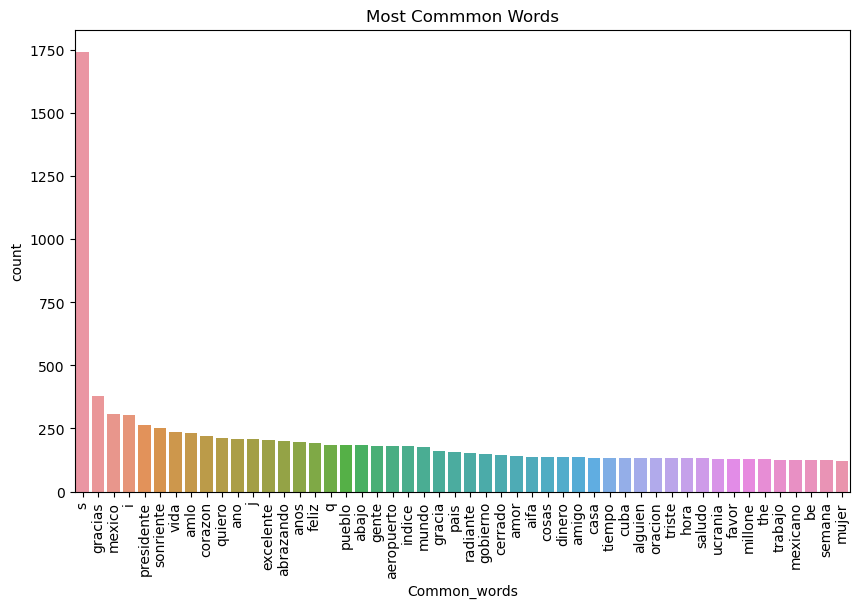

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq, ax=ax)
plt.title("Most Commmon Words")
plt.xticks(rotation='vertical');

In [13]:
import wordcloud
def show_wordcloud(freq, title):
    text = ' '.join(freq['Common_words'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='Paired', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

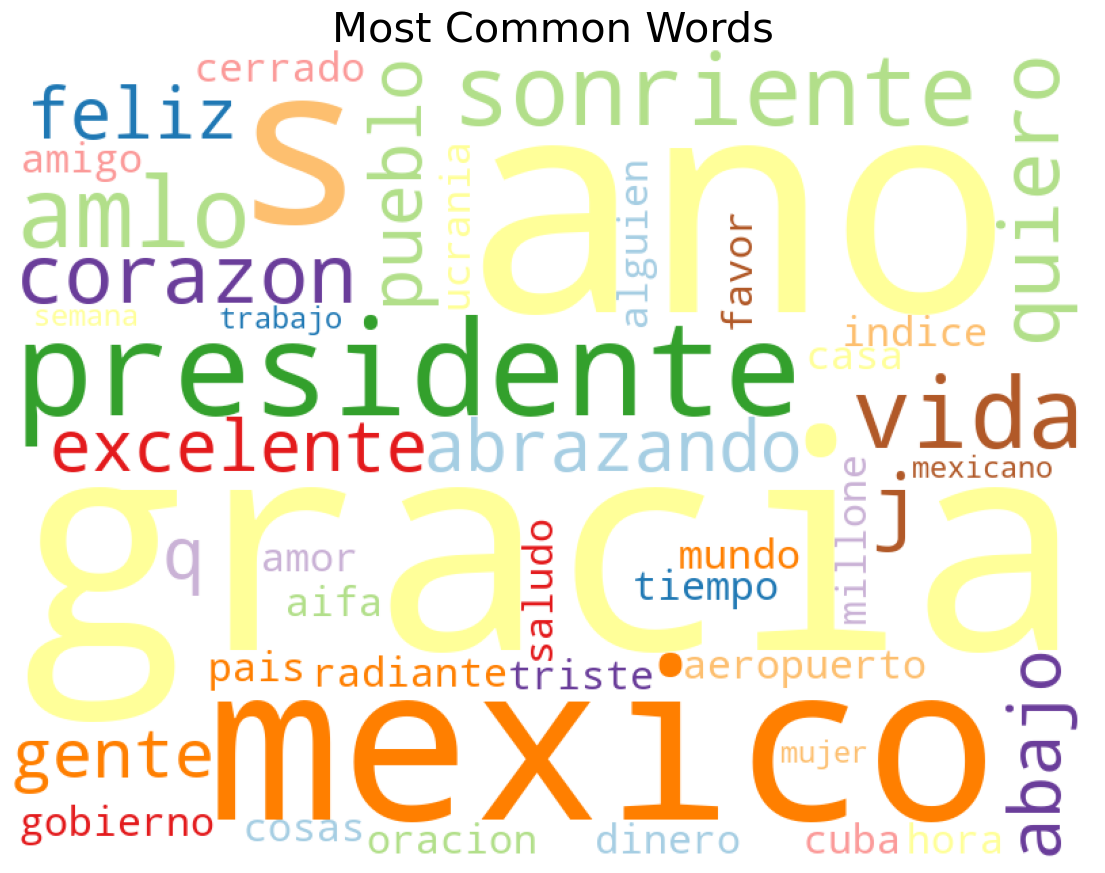

In [14]:
show_wordcloud(freq, "Most Common Words")

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Save the file for modelling

In [15]:

data.to_csv('text_clean_mxcorpus.csv')

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------